# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
# initialize the variables for the print strings
record = 1
set_num = 1

# city, cloudiness, country, date, humidity, lat, lng, max temp, wind speed
city = []
cloudiness = []
country = []
date = []
humidity = []
lng = []
windspeed = []
lat = []
temp = []


In [62]:
# make the base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"


In [63]:
# begin the for loop for data retrieval
units = "imperial"
print("Beginning Data Retrieval")
print("-----------------------------")
for place in cities:
    try:
        query_url = f"{base_url}appid={api_key}&q={place}&units={units}"
        response = requests.get(query_url).json()
        print(f"Processing Record {record} of Set {set_num} | {response['name']}")

        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lng.append(response['coord']['lon'])
        windspeed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
            
        record += 1
        
        if record > 50:
            record = 1
            set_num += 1
        time.sleep(1.1)
    except KeyError:
        print("City not found. Skipping...")        

    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
# end for

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Destin
Processing Record 2 of Set 1 | Ushuaia
Processing Record 3 of Set 1 | Atuona
Processing Record 4 of Set 1 | Zhigansk
Processing Record 5 of Set 1 | Mar del Plata
Processing Record 6 of Set 1 | Kavaratti
Processing Record 7 of Set 1 | Yellowknife
Processing Record 8 of Set 1 | Tilichiki
Processing Record 9 of Set 1 | Bluff
Processing Record 10 of Set 1 | Puerto Ayora
Processing Record 11 of Set 1 | Hilo
Processing Record 12 of Set 1 | Geraldton
Processing Record 13 of Set 1 | Los Llanos de Aridane
Processing Record 14 of Set 1 | Saint-Philippe
Processing Record 15 of Set 1 | Castro
Processing Record 16 of Set 1 | New Norfolk
Processing Record 17 of Set 1 | Khuzdar
Processing Record 18 of Set 1 | Faanui
Processing Record 19 of Set 1 | Butaritari
Processing Record 20 of Set 1 | Nemuro
Processing Record 21 of Set 1 | Tiksi
Processing Record 22 of Set 1 | Rikitea
Processing Record 23 of Set 1 | Hith

Processing Record 32 of Set 4 | Chuy
Processing Record 33 of Set 4 | Talnakh
Processing Record 34 of Set 4 | Shingu
Processing Record 35 of Set 4 | Mastic Beach
Processing Record 36 of Set 4 | Torbay
Processing Record 37 of Set 4 | Ihtiman
Processing Record 38 of Set 4 | Japura
Processing Record 39 of Set 4 | Guanay
Processing Record 40 of Set 4 | Amapa
Processing Record 41 of Set 4 | Lebu
City not found. Skipping...
Processing Record 42 of Set 4 | Bahir Dar
Processing Record 43 of Set 4 | Storforshei
Processing Record 44 of Set 4 | Lompoc
Processing Record 45 of Set 4 | Bom Jesus dos Perdoes
Processing Record 46 of Set 4 | Tura
Processing Record 47 of Set 4 | Taketoyo
Processing Record 48 of Set 4 | Kavieng
Processing Record 49 of Set 4 | Bayevo
Processing Record 50 of Set 4 | Flinders
Processing Record 1 of Set 5 | Simpang Empat
Processing Record 2 of Set 5 | El Paso
Processing Record 3 of Set 5 | Khurja
Processing Record 4 of Set 5 | Darhan
Processing Record 5 of Set 5 | Wanning
Pro

Processing Record 25 of Set 8 | Atambua
Processing Record 26 of Set 8 | San Quintin
Processing Record 27 of Set 8 | Nguruka
Processing Record 28 of Set 8 | Caninde de Sao Francisco
Processing Record 29 of Set 8 | Rio Grande
Processing Record 30 of Set 8 | North Bend
Processing Record 31 of Set 8 | Haines Junction
Processing Record 32 of Set 8 | Vestmannaeyjar
Processing Record 33 of Set 8 | Schluchtern
Processing Record 34 of Set 8 | Hasaki
Processing Record 35 of Set 8 | Nauta
City not found. Skipping...
Processing Record 36 of Set 8 | Wladyslawowo
Processing Record 37 of Set 8 | Sonneberg
Processing Record 38 of Set 8 | Jiuquan
Processing Record 39 of Set 8 | Kichmengskiy Gorodok
Processing Record 40 of Set 8 | Ranong
City not found. Skipping...
Processing Record 41 of Set 8 | Markova
Processing Record 42 of Set 8 | Chontalpa
City not found. Skipping...
Processing Record 43 of Set 8 | Hamilton
Processing Record 44 of Set 8 | Vigrestad
Processing Record 45 of Set 8 | Kosh-Agach
Proces

In [45]:
len(city)
len(cloudiness)
len(country)
len(date)
len(humidity)
# NO DATA
len(lng)
len(windspeed)
len(lat)
len(temp)

0

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
# city, cloudiness, country, date, humidity, lat, lng, max temp, wind speed
city_data = {"City": city, "Cloudiness": cloudiness , "Country": country , "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp": temp, "Wind Speed": windspeed}
city_data_df = pd.DataFrame(city_data)
city_data_df.count()
city_data_df.to_csv("cities_data.csv", header=True)

In [66]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Destin,90,US,1552003559,62,30.39,-86.50,59.00,8.05
1,Ushuaia,75,AR,1551999600,80,-54.81,-68.31,41.00,28.86
2,Atuona,12,PF,1552003680,100,-9.80,-139.03,82.71,14.27
3,Zhigansk,68,RU,1552003681,72,66.77,123.37,8.28,3.65
4,Mar del Plata,0,AR,1552003683,52,-46.43,-67.52,57.11,7.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

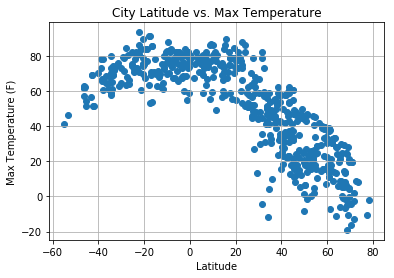

In [69]:
y = city_data_df["Max Temp"]
x = city_data_df["Lat"]

plt.scatter(x, y, marker="o")
plt.grid()
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("lat_vs_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

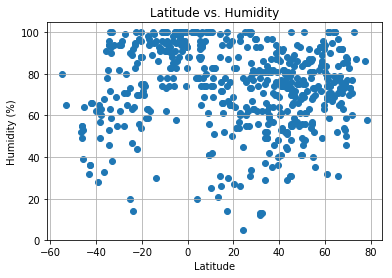

In [70]:
y = city_data_df["Humidity"]
x = city_data_df["Lat"]

plt.scatter(x, y, marker="o")
plt.grid()
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

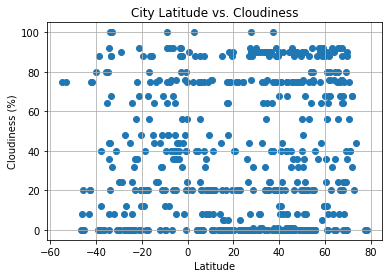

In [71]:
y = city_data_df["Cloudiness"]
x = city_data_df["Lat"]

plt.scatter(x, y, marker="o")
plt.grid()
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

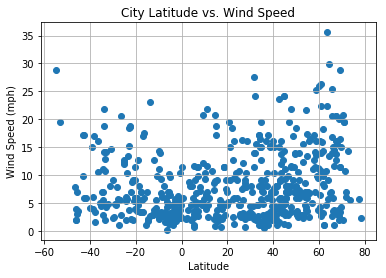

In [72]:
y = city_data_df["Wind Speed"]
x = city_data_df["Lat"]

plt.scatter(x, y, marker='o')
plt.grid()
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("lat_vs_wind_speed.png")
plt.show()

# Observations

1. There is no correlation between latitude and wind speed
2. There is no correlation between latitude and cloudiness
3. There is no correlation between latitude and humidity

:( No correlations at all! What a shame!